In [41]:
#importing the required librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('loan_data_set.csv')
#viewing the first two 
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


I would be working with this copy through out the project while the original dataframe would be for referencing when needed .

In [43]:
#making a copy of my dataset
df_c = df.copy()
df_c.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
print(f"This is the Informations Of The Dataset :\n")
df_c.info()

This is the Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
#the description of the dataframe
print(f"Summary and Description Of The Dataset :\n")
df_c.describe().T

Summary and Description Of The Dataset :



,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [46]:
#the number of rows and columns 
rows, columns = df_c.shape
print(f"There are {rows} rows and {columns} columns in the dataset")

There are 614 rows and 13 columns in the dataset


## Data Cleaning

In [48]:
# Converting all the header name into lower case
df_c.columns = [x.lower() for x in df_c.columns]

In [52]:
#renaming the dataset columns for accuracy
df_c.rename(columns = {'applicantincome' : 'applicant_income',
                      'coapplicantincome' : 'coapplicant_income',
                      'loanamount' : 'loan_amount'}, inplace = True)

In [57]:
#confirming the null values in the data
df_c.isna().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [65]:
#checking the percentage of missing values
percent_missing = round(df_c.isnull().sum() * 100 / len(df), 2).sort_values(ascending = False)
percent_missing

credit_history        8.14
self_employed         5.21
loan_amount           3.58
dependents            2.44
loan_amount_term      2.28
gender                2.12
married               0.49
loan_id               0.00
education             0.00
applicant_income      0.00
coapplicant_income    0.00
property_area         0.00
loan_status           0.00
dtype: float64

In [80]:
#replacing the null values in the columns
for col in df_c:
    #check if it is a number
    if df_c[col].dtype == 'float64' or df_c[col].dtype == 'int':
        df_c[col].fillna(df_c[col].median(), inplace = True)
        
    else:
        df_c[col].fillna(df_c[col].mode()[0], inplace = True)

In [82]:
#confirming the null values have been filled
df_c.isna().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

# Explonatory Data Analysis
Lets explore our dataset

In [84]:
#sampling the dataset
df_c.sample(3)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
297,LP001954,Female,Yes,1,Graduate,No,4666,0.0,135.0,360.0,1.0,Urban,Y
529,LP002716,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban,Y
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N


In [87]:
# confirming the unique values in loan_status column
df_c.loan_status.unique()

array(['Y', 'N'], dtype=object)

- Since our target variable is `loan_status`, it's okay to change it from a categorial to numerical column

In [90]:
#categorical to numerical
new_label = {'loan_status': {'Y': 1, 'N': 0}}
df_c.replace(new_label , inplace = True)

In [101]:
#selecting only the numerical columns
numerical_colms = df_c.select_dtypes('number').columns
numerical_colms

Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'loan_status'],
      dtype='object')

In [102]:
#showing the relationship between loan_status and other columns
df_c.corr()['loan_status'].sort_values(ascending = False)

loan_status           1.000000
credit_history        0.540556
applicant_income     -0.004710
loan_amount_term     -0.022549
loan_amount          -0.033214
coapplicant_income   -0.059187
Name: loan_status, dtype: float64

#### <span style='color:blue'> Although it is a weak correlation, the `credit history` is the sole column that shows a positive relationship with the `loan_status`. This indicates that a person's credit history can predict whether they would be approved for credit or not.</span>

### Data Skewness

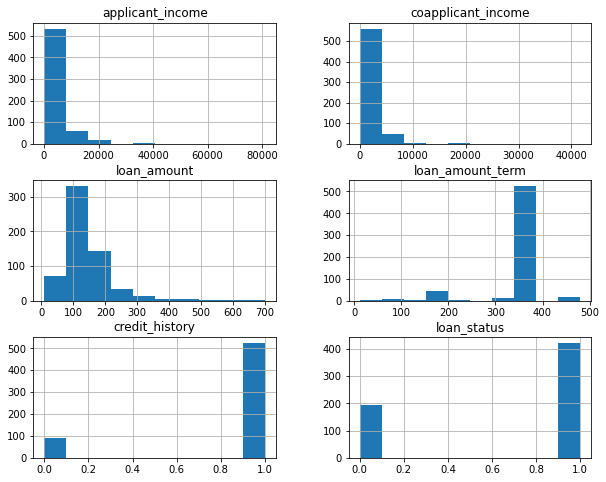

In [109]:
#checking their distribution
df_c[numerical_colms].hist(figsize=[10,8])
plt.show()

In [128]:
#checking out for skewness
def skewness_confirm():
        
        skew_number = []
        for col in df_c.select_dtypes("number"):
            skew_num = df_c[col].skew()
            skew_number.append((col , skew_num))
            
        return sorted(skew_number , key = lambda x :x[1] , reverse = True)

In [131]:
#using the defined function
sk_cols = skewness_confirm()
sk_cols

[('coapplicant_income', 7.491531216657306),
 ('applicant_income', 6.539513113994625),
 ('loan_amount', 2.743052748820892),
 ('loan_status', -0.8099980938586473),
 ('credit_history', -2.0219705924848985),
 ('loan_amount_term', -2.4021122563890396)]

In [132]:
#checking their skewness
df_c[numerical_colms].skew().sort_values(ascending = False)

coapplicant_income    7.491531
applicant_income      6.539513
loan_amount           2.743053
loan_status          -0.809998
credit_history       -2.021971
loan_amount_term     -2.402112
dtype: float64

- Positive value means the distribution is skewed to the right.
- Negative value means the distribution is skewed to the left.
- 0 means perfect normal distribution. The bell shaped curve.
- Skewed data also does not work well with many statistical methods. 

#### Dealing with skewed data using log transformation: transform skewed distribution to a normal distribution

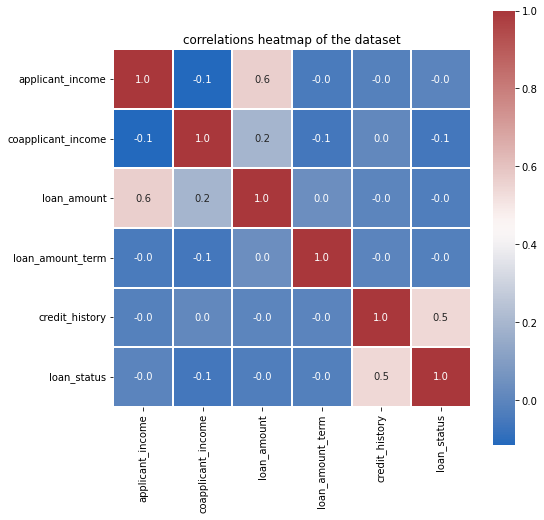

In [133]:
plt.figure(figsize=(8,8))
sns.heatmap(df_c.corr(), annot=True,  square=True, linecolor='white',linewidths = 2, fmt= '.1f', cmap="vlag")
plt.title('correlations heatmap of the dataset', fontsize= 12)
plt.show()

### Identifying outliers in columns

In [134]:
#looking out for outliers
def outliers_analysis():
        cols_store = []
    
        for col in df_c.select_dtypes("number"): 
            q1 = df_c[col].quantile(.25)
            q3 = df_c[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df_c[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df_c[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                cols_store.append(col)

        return cols_store

In [146]:
#using the defined function
out_cols = outliers_analysis()
out_cols[0:]

['applicant_income',
 'coapplicant_income',
 'loan_amount',
 'loan_amount_term',
 'credit_history']